In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
training_data = pd.read_csv("optdigits.tra", header=None)
test_data = pd.read_csv("optdigits.tes", header=None)

In [3]:
X_training, y_training = training_data.iloc[:, :-1], training_data.iloc[:, 64]
X_test, y_test = test_data.iloc[:, :-1], test_data.iloc[:, 64]

Logistic regression (multi class) without Penalty

In [4]:
clf = LogisticRegression(random_state=23, solver='sag', multi_class='multinomial', penalty = 'none').fit(X_training, y_training)

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [5]:
training_accuracy_wp =  clf.score(X_training, y_training)
testing_accuracy_wp = clf.score(X_test, y_test)

Text(0.5, 1.0, 'Accuracy without Penalization')

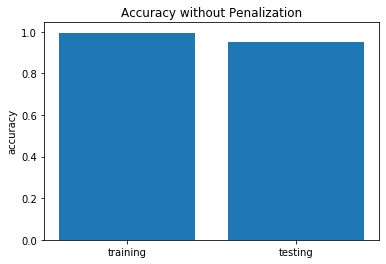

In [6]:
labels = ('training', 'testing')
plt.bar(np.arange(len(labels)), [training_accuracy_wp,testing_accuracy_wp], align='center')
plt.xticks(np.arange(len(labels)), labels)
plt.ylabel("accuracy")
plt.title("Accuracy without Penalization")


Logistic regression (multi class) with different regularization terms

In [7]:
lamb = [0.001, 0.01, 0.1, 0.5, 1, 10, 100]
training_accuracy = np.zeros(len(lamb))
testing_accuracy = np.zeros(len(lamb))
for i,l in enumerate(lamb):
    clf = LogisticRegression(random_state=23, solver='sag', multi_class='multinomial', C = 1.0/l).fit(X_training, y_training)
    training_accuracy[i] = clf.score(X_training, y_training)
    testing_accuracy[i] =clf.score(X_test, y_test)

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

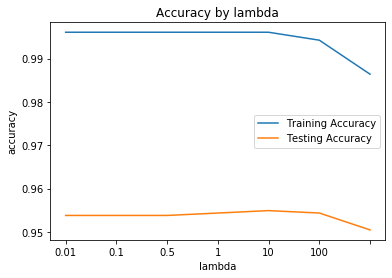

In [8]:
fig, ax = plt.subplots()
ax.plot(range(len(lamb)), training_accuracy, label='Training Accuracy')
ax.plot(range(len(lamb)), testing_accuracy, label='Testing Accuracy')
ax.set_ylabel("accuracy")
ax.set_xlabel("lambda")
ax.set_xticklabels(lamb)
ax.set_title("Accuracy by lambda")
ax.legend()